In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

In [23]:
folha_url = "bases/base_final_folha_completo.xlsx"

In [24]:
df = pd.read_excel(folha_url)
df.shape

(4630, 8)

In [25]:
df.metaforico.value_counts()

nao    3496
sim    1134
Name: metaforico, dtype: int64

In [26]:
df["paragrafos_tratados_sw"] = df["paragrafos_tratados_sw"].apply(str)

In [27]:
df.metaforico.value_counts(normalize = True)

nao    0.755076
sim    0.244924
Name: metaforico, dtype: float64

In [28]:
grp = df.groupby(["ano", "metaforico"], as_index = False).size()
grp_ano = df.groupby(["ano"], as_index = False).size().rename(columns = {"size": "qtd_ano"})
grp1 = grp.merge(grp_ano, on = "ano", how = "left")
grp1["percentual"] = (grp1["size"] / grp1["qtd_ano"]) * 100

grp_prop = grp.pivot_table(index = ["ano"], columns = ["metaforico"], values = ["size"]).reset_index()
grp_prop.columns = ["ano", "nao", "sim"]
grp_prop["proporcao"] = grp_prop["sim"] / grp_prop["nao"]

grp2 = grp1.merge(grp_prop[["ano","proporcao"]], on = "ano", how = "left")

grp2.head()

ano metaforico  size  qtd_ano  percentual  proporcao
0  2001        nao   323      404   79.950495   0.250774
1  2001        sim    81      404   20.049505   0.250774
2  2002        nao   321      405   79.259259   0.261682
3  2002        sim    84      405   20.740741   0.261682
4  2003        nao   139      229   60.698690   0.647482

# Gráficos em Linhas

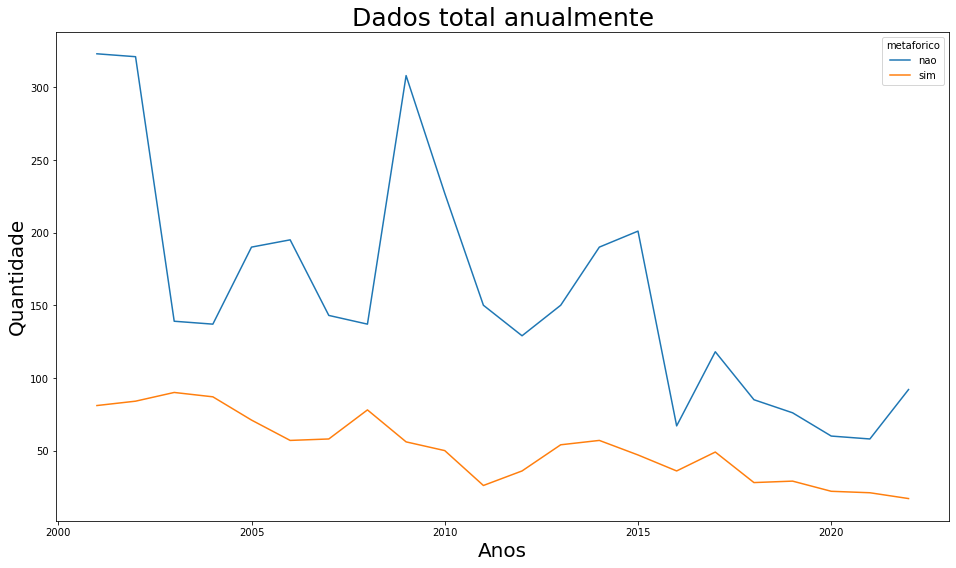

In [29]:
plt.figure(figsize = (16, 9))
ax = sns.lineplot(x = "ano", y = "size", data = grp2, hue = "metaforico")
ax.set_title("Dados total anualmente", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Quantidade", fontsize = 20)
ax = ax

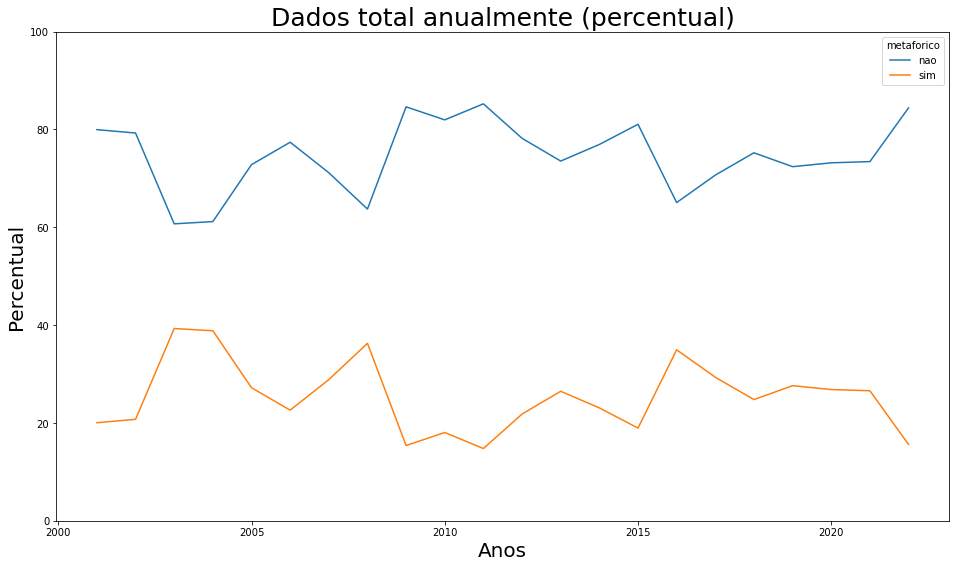

In [30]:
plt.figure(figsize = (16, 9))
ax = sns.lineplot(x = "ano", y = "percentual", data = grp2, hue = "metaforico")
ax.set_title("Dados total anualmente (percentual)", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Percentual", fontsize = 20)
ax.set_ylim(0, 100)
ax = ax

# Gráficos em barras

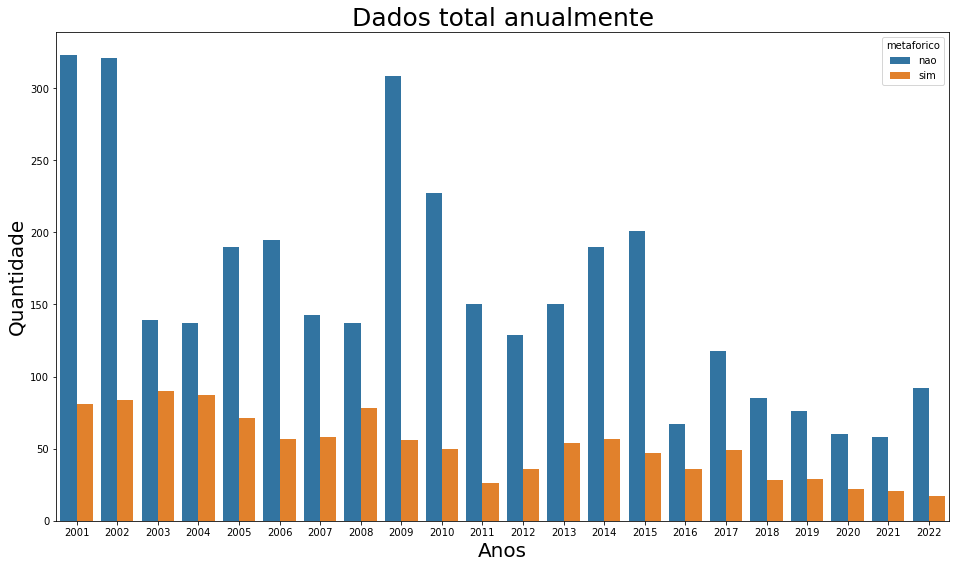

In [31]:
plt.figure(figsize= (16, 9))
ax = sns.barplot(x = "ano", y = "size", hue = "metaforico", data = grp2)
ax.set_title("Dados total anualmente", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Quantidade", fontsize = 20)
ax = ax

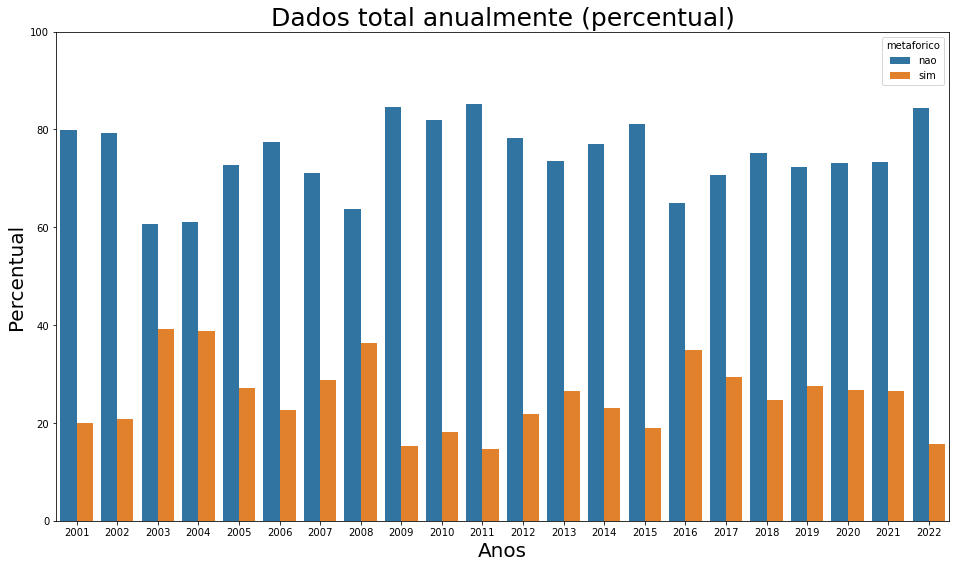

In [32]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x = "ano", y = "percentual", data = grp2, hue = "metaforico")
ax.set_title("Dados total anualmente (percentual)", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Percentual", fontsize = 20)
ax.set_ylim(0, 100)
ax = ax

# Nuvens de palavras completas 

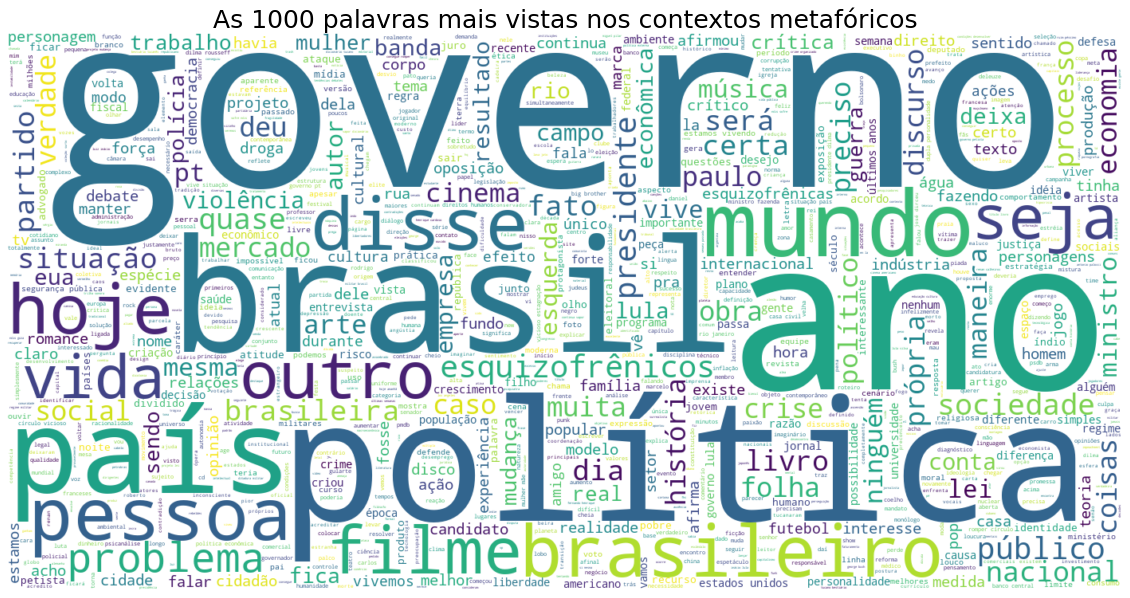

In [33]:
wc = WordCloud(background_color='white', max_words=1000, width=1400, height=700)

bloco = ' '.join(df.query("metaforico == 'sim'").paragrafos_tratados_sw) # Passar o bloco é padrão
lista = bloco.split(" ") # assim posso remover algumas palavras

palavras_removidas = ["esquizofrênico", "esquizofrênica", "esquizofrenico","esquizofrenica", "há", "esquizofrenia", "são"]

lista_sem_especificas = [palavra for palavra in lista if palavra not in palavras_removidas]
bloco_sem_especificas = " ".join(lista_sem_especificas)

wc.generate(bloco_sem_especificas)
# wc.generate(bloco)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("As 1000 palavras mais vistas nos contextos metafóricos", fontsize = 25)
plt.show()

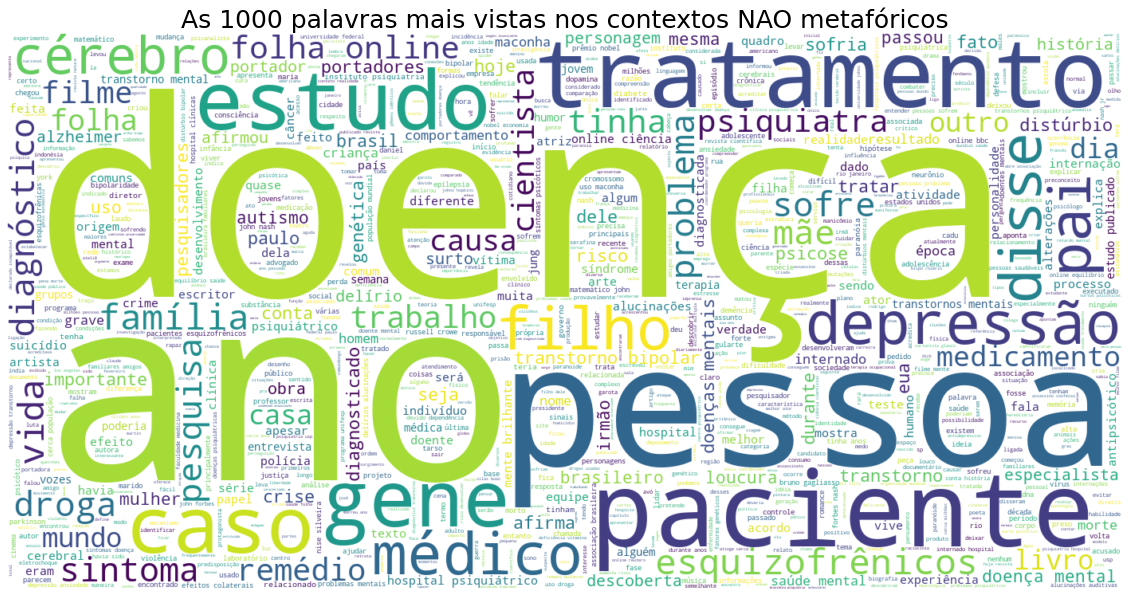

In [34]:
wc = WordCloud(background_color='white', max_words=1000, width=1400, height=700)

bloco = ' '.join(df.query("metaforico == 'nao'").paragrafos_tratados_sw) # Passar o bloco é padrão
lista = bloco.split(" ") # assim posso remover algumas palavras

palavras_removidas = ["esquizofrênico", "esquizofrênica", "esquizofrenico","esquizofrenica", "há", "esquizofrenia", "são"]

lista_sem_especificas = [palavra for palavra in lista if palavra not in palavras_removidas]
bloco_sem_especificas = " ".join(lista_sem_especificas)

wc.generate(bloco_sem_especificas)
# wc.generate(bloco)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("As 1000 palavras mais vistas nos contextos NAO metafóricos", fontsize = 25)
plt.show()

# Nuvens de palavras por ano

In [35]:
def nuvem_palavras(ano, num):
    bloco = ' '.join(df.query(f"ano == {ano} and metaforico == '{num}'").paragrafos_tratados_sw) # Passar o bloco é padrão
    lista = ' '.join(df.query(f"ano == {ano} and metaforico == '{num}'").paragrafos_tratados_sw).split(" ") # assim posso remover algumas palavras
    
    palavras_removidas = ["esquizofrênico", "esquizofrênica", "esquizofrenico","esquizofrenica", "há", "esquizofrenia", "são"]
    
    lista_sem_especificas = [palavra for palavra in lista if palavra not in palavras_removidas]
    bloco_sem_especificas = " ".join(lista_sem_especificas)
    
    wc.generate(bloco_sem_especificas)
    # wc.generate(bloco)
    plt.figure(figsize=(20,20))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    if num == 'nao':
        plt.title(f"{ano} | As 1000 palavras mais vistas nos contextos CLASSIFICADO COMO NAO metafóricos ({ano})", fontsize = 25)
        plt.show()
    else: 
        plt.title(f"{ano} | As 1000 palavras mais vistas nos contextos CLASSIFICADO COMO metafóricos ({ano})", fontsize = 25)
        plt.show()

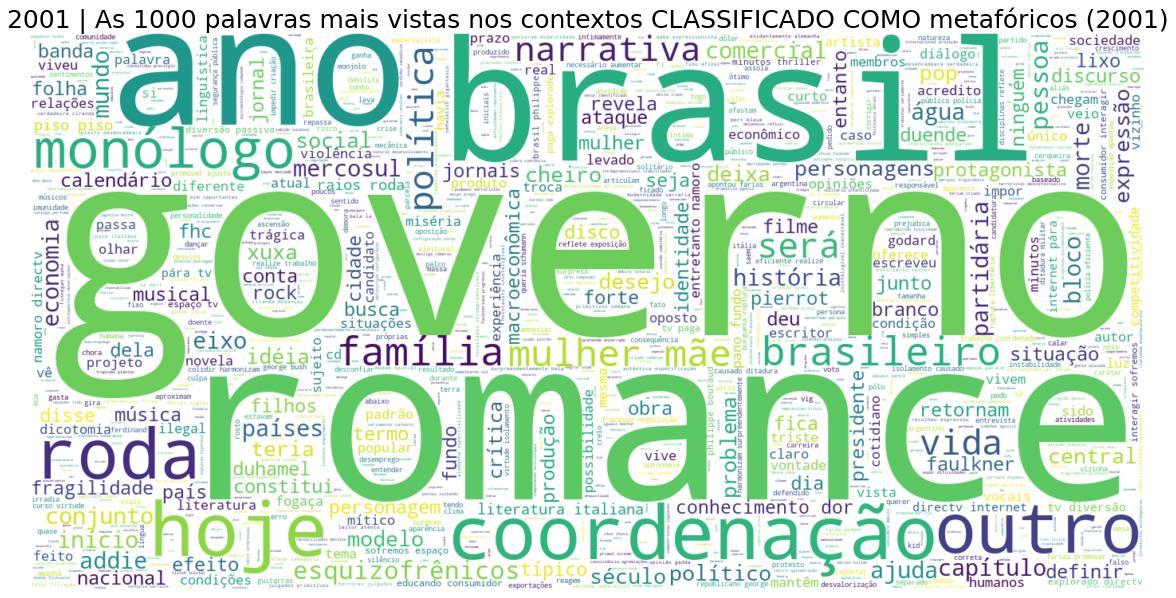

In [36]:
nuvem_palavras("2001", "sim")

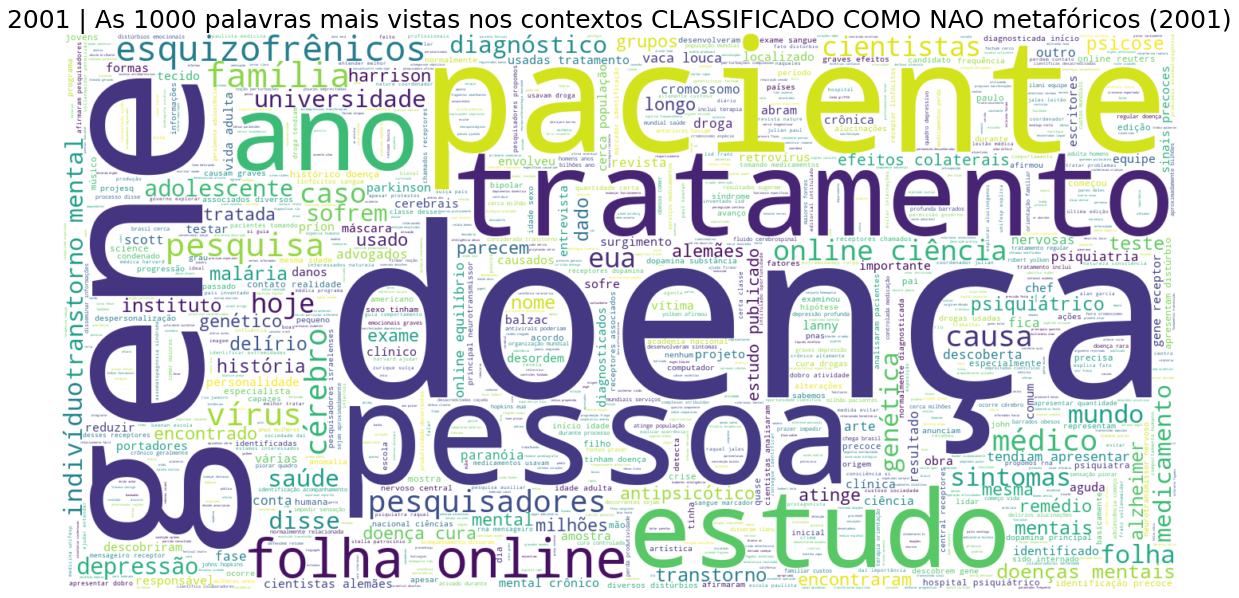

In [37]:
nuvem_palavras("2001", "nao")

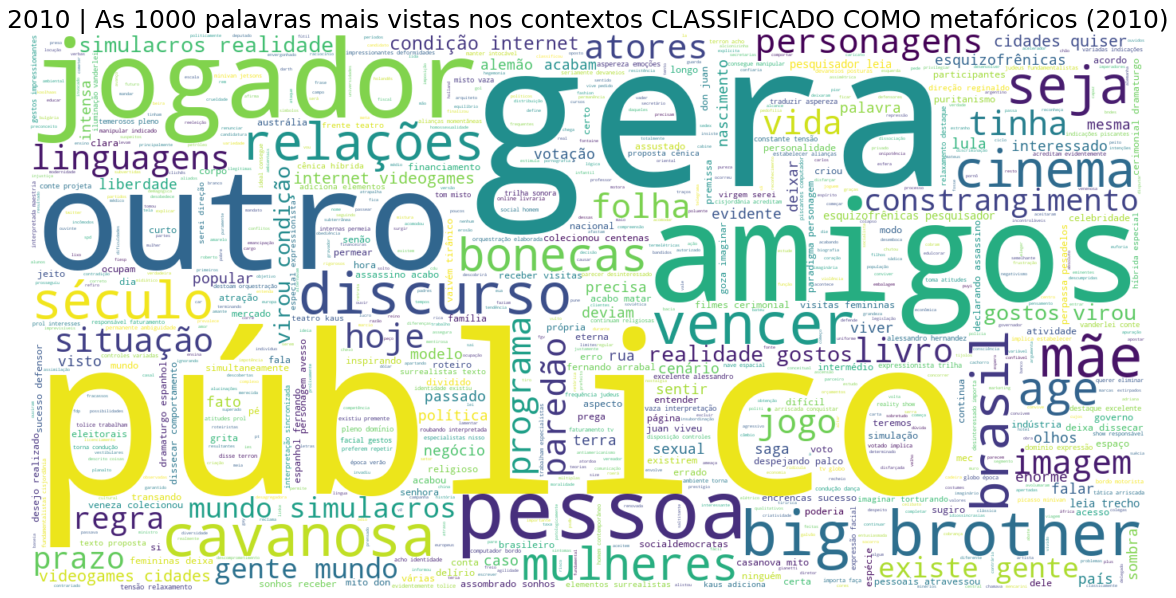

In [38]:
nuvem_palavras("2010", "sim")

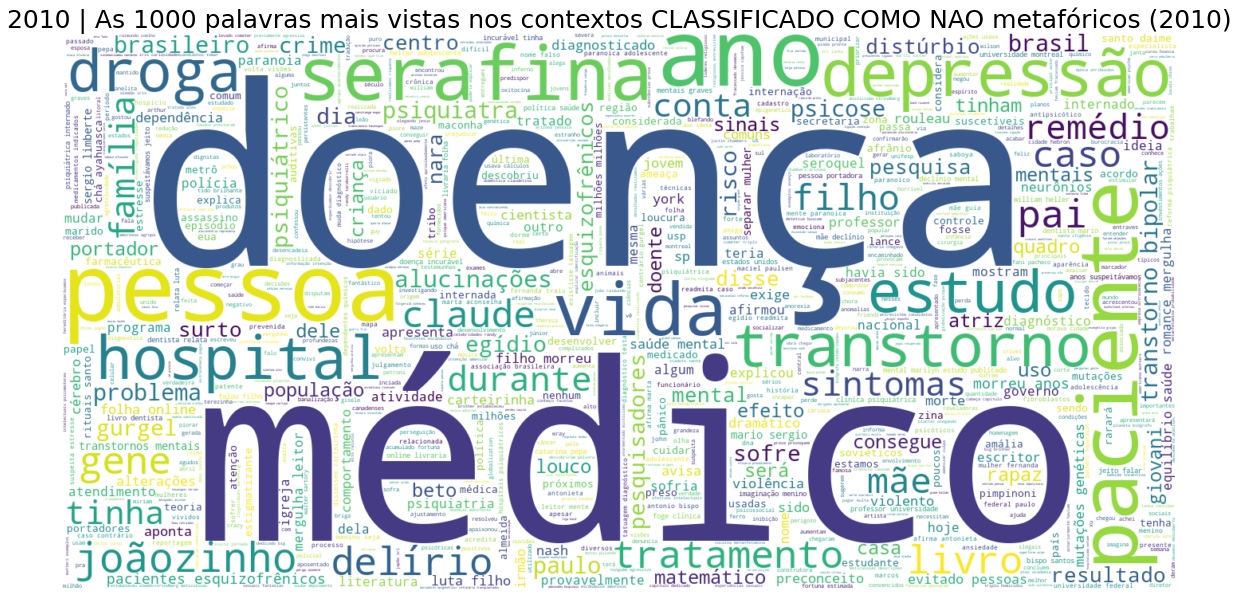

In [39]:
nuvem_palavras("2010", "nao")

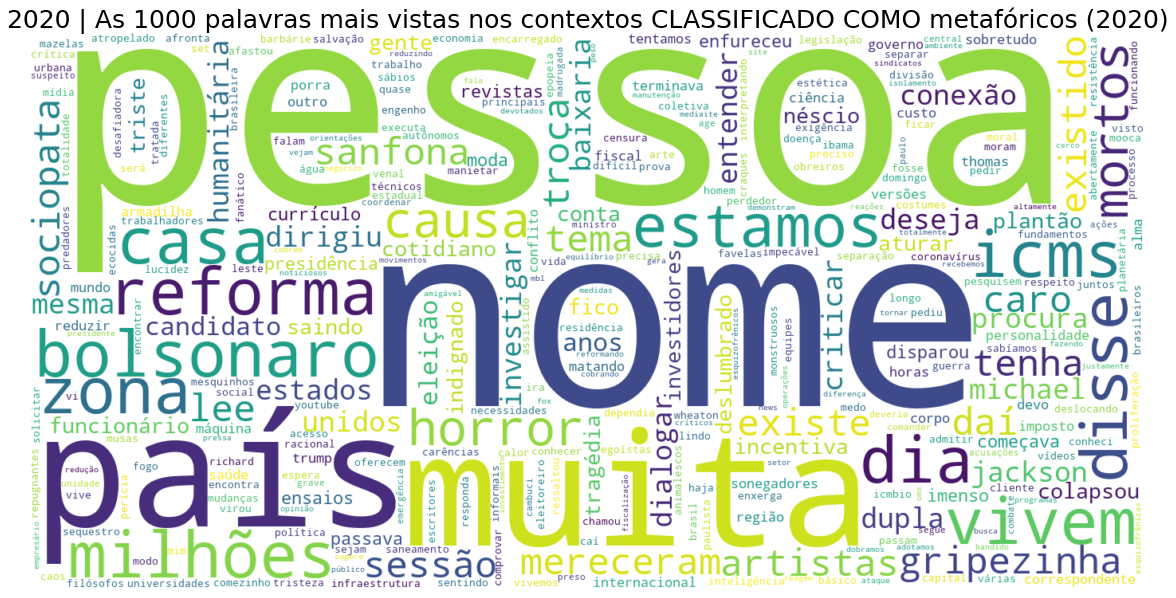

In [40]:
nuvem_palavras("2020", "sim")

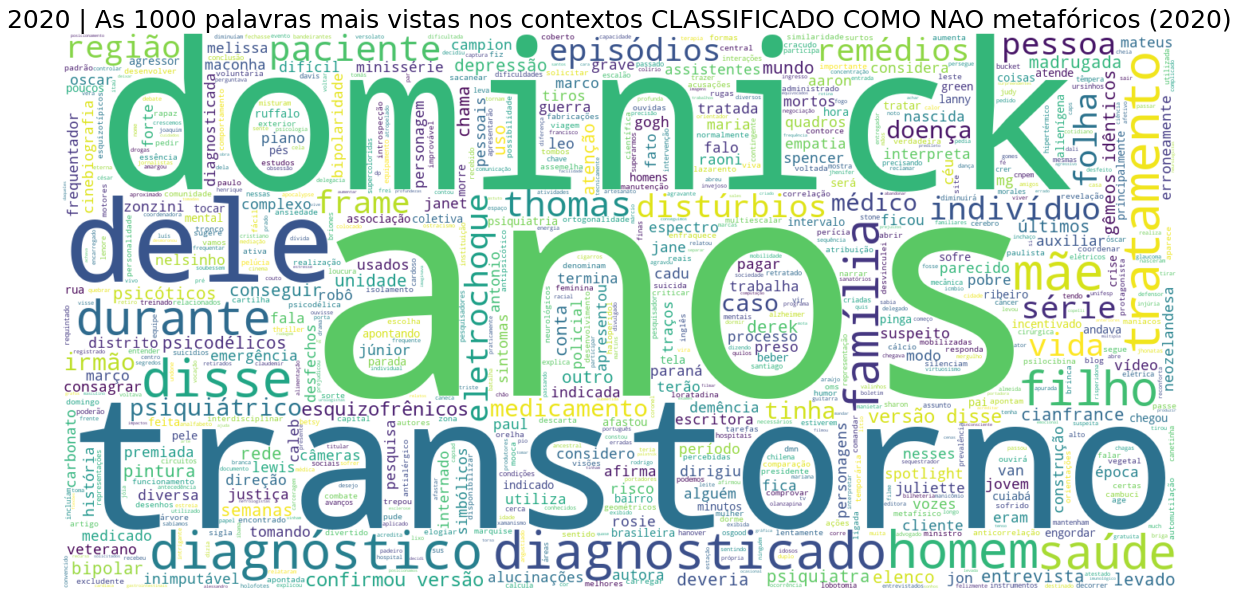

In [41]:
nuvem_palavras("2020", "nao")

In [42]:
!jupyter nbconvert --to html --no-input analise_folha.ipynb

[NbConvertApp] Converting notebook analise_folha.ipynb to html
[NbConvertApp] Writing 7612730 bytes to analise_folha.html
